In [9]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from PIL import Image
import os
from google.colab import files

In [ ]:
drive.mount('/content/drive')
#Importing the dataset
df3 = pd.read_csv('/content/drive/My Drive/predicted_by_MLP.csv')

Mounted at /content/drive


In [3]:
plt.rcParams['font.size'] = 18

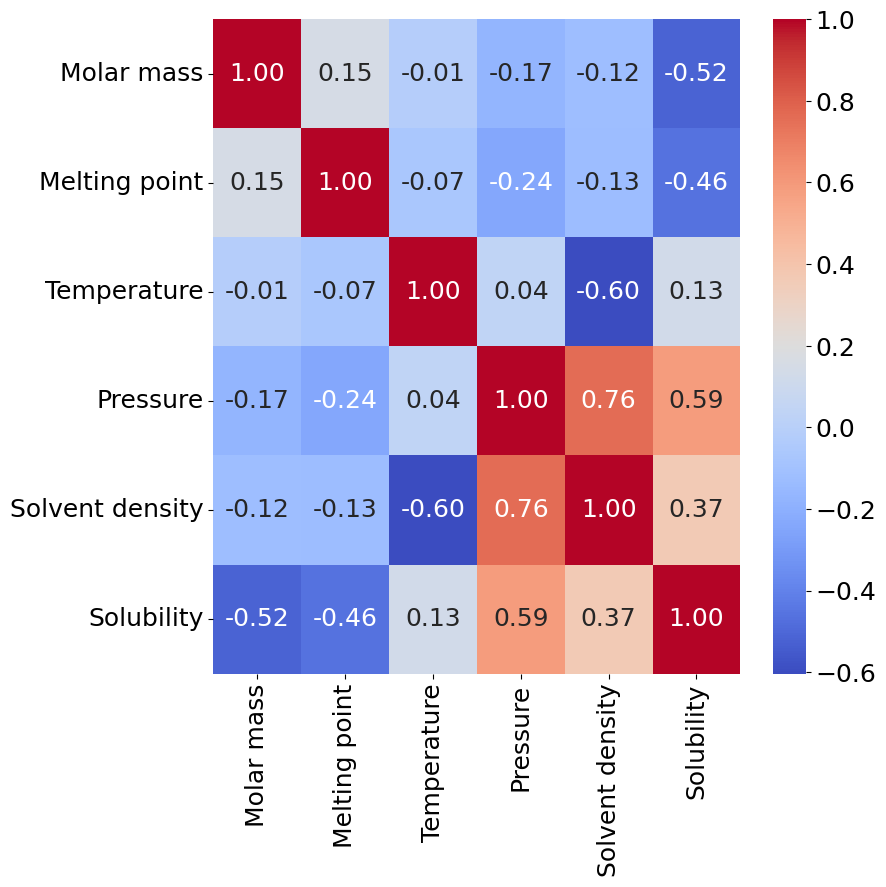

In [8]:

#Heatmap of correlation
# Calculate Spearman's correlation between input features and 'y6'
df33 = df3.iloc[:, 1:-1]
new_column_names = ['Molar mass', 'Melting point', 'Temperature', 'Pressure', 'Solvent density', 'Solubility']  # Example new names
df33.columns = new_column_names
spearman_corr = df33.corr(method='spearman')

spearman_corr_y6 = spearman_corr['Solubility'].drop('Solubility')

plt.figure(figsize=(8.5, 8.5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')


temp_filename = 'temp_drugs.tiff'
plt.savefig(temp_filename, dpi=800)

img = Image.open(temp_filename)

output_filename = 'drugs.tiff'
img.save(output_filename, compression='tiff_lzw')

os.remove(temp_filename)
# files.download(output_filename)
plt.show()


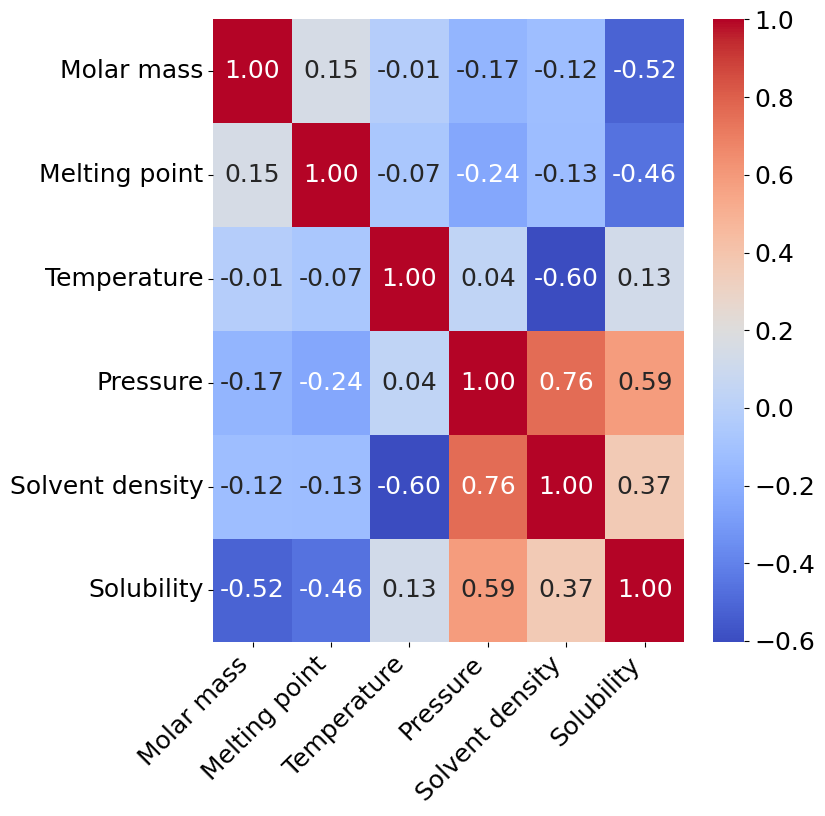

In [7]:

plt.figure(figsize=(8.5, 8.5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
temp_filename = 'spearman.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)

output_filename = 'spearman_lzw.tiff'
img.save(output_filename, compression='tiff_lzw')


os.remove(temp_filename)

from google.colab import files
#files.download(output_filename)
plt.show()

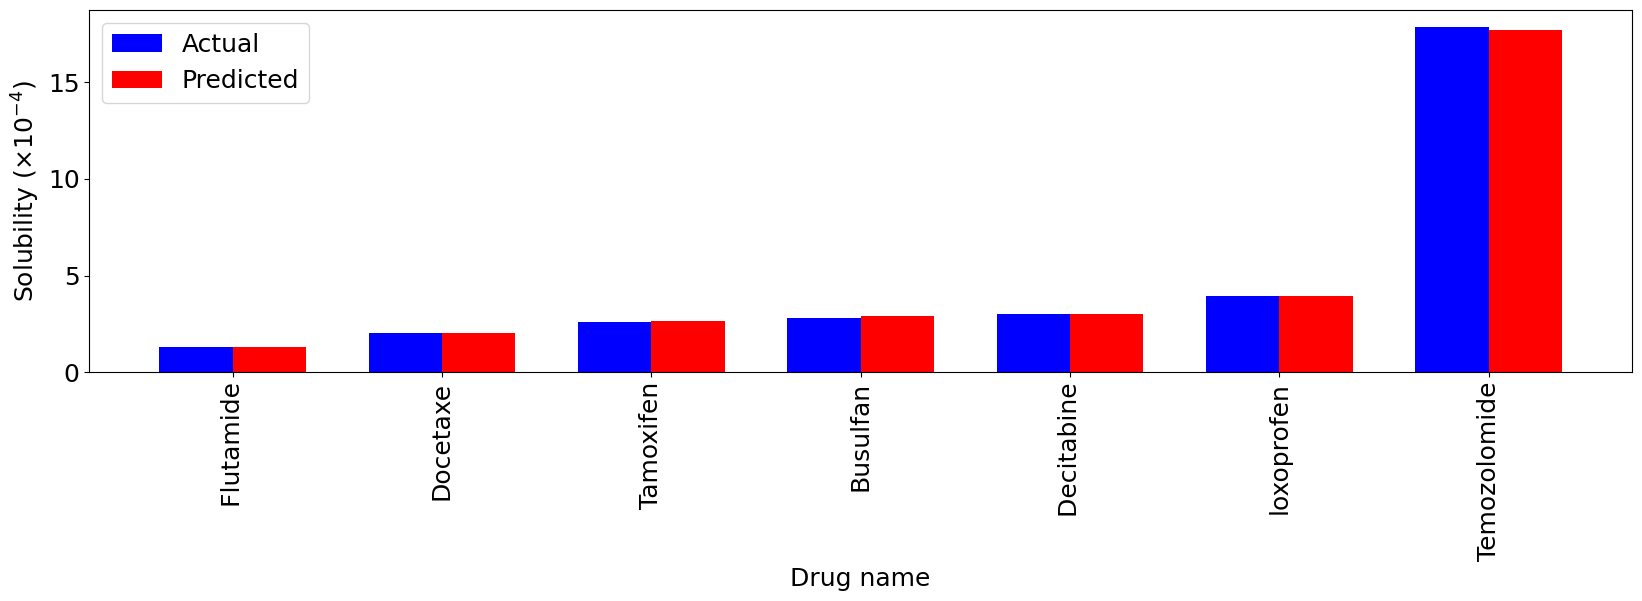

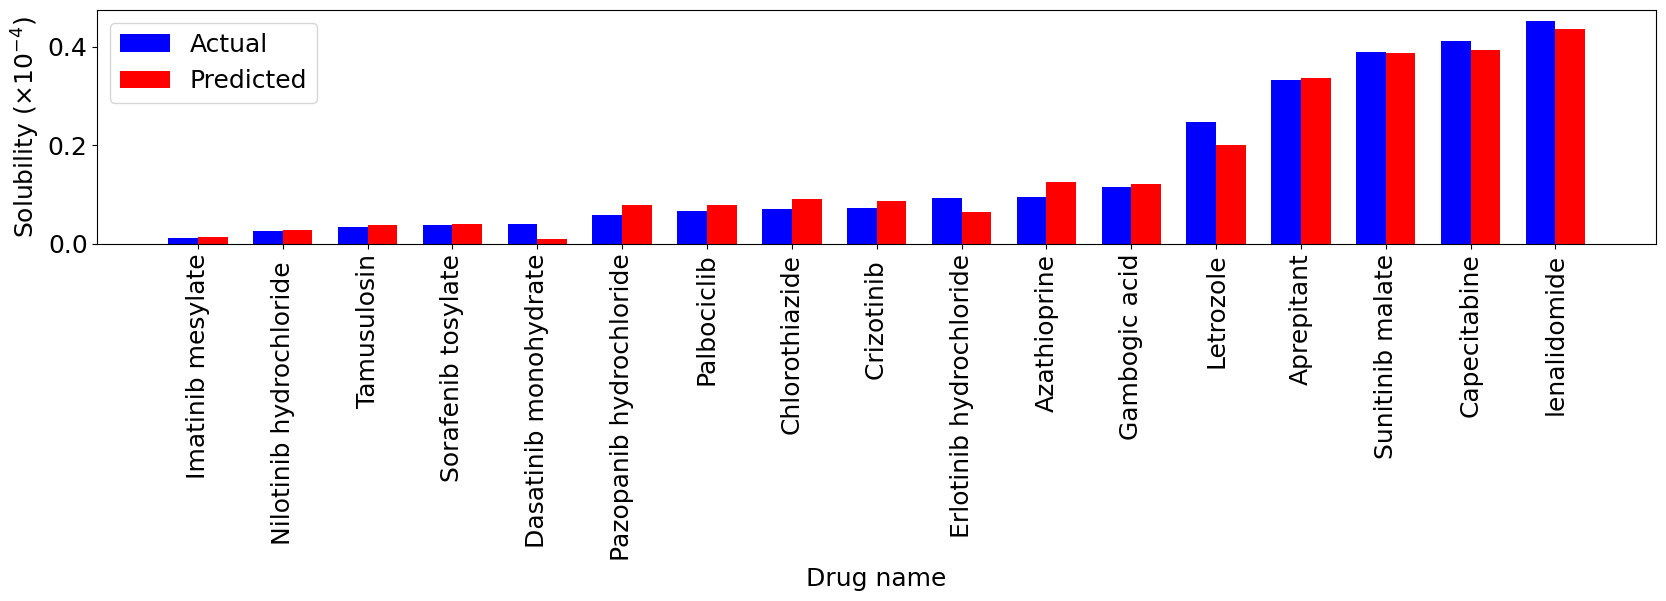

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files


grouped_df = df3.groupby('Drug name').agg({
    'y6': 'mean',
    'Predicted': 'mean'
}).reset_index()


# Split the data into two DataFrames based on the y6 value
grouped_df_under_50 = grouped_df[grouped_df['y6'] < 50]
grouped_df_50_or_higher = grouped_df[grouped_df['y6'] >= 50]

# Function to plot the data
def plot_grouped_df(grouped_df, title, name, num):
    grouped_df = grouped_df.sort_values(by='y6', ascending=True)

    # Set the figure size for the plot (18x9 inches)
    plt.figure(figsize=(17, 6.35))

    # Define the bar width and the positions of the bars
    bar_width = 0.35
    r1 = range(len(grouped_df))
    r2 = [x + bar_width for x in r1]

    # Create bar plots for actual and predicted values
    plt.bar(r1, grouped_df['y6']/100, width=bar_width, label='Actual', color='b', align='center')
    plt.bar(r2, grouped_df['Predicted'].abs()/100, width=bar_width, label='Predicted', color='r', align='center')

    plt.xlabel('Drug name')
    plt.ylabel(r'Solubility ($\times 10^{-4}$)')
    #plt.title(title)
    plt.xticks([r + bar_width/2 for r in range(len(grouped_df))], grouped_df['Drug name'], rotation=90)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=18)
    plt.tight_layout()
    temp_filename = num+'sol.tiff'
    plt.savefig(temp_filename, dpi=600)

    img = Image.open(temp_filename)

    output_filename = num+'sol_lzw_short.tiff'
    img.save(output_filename, compression='tiff_lzw')


    os.remove(temp_filename)
    from google.colab import files
    #files.download(output_filename)

    # Display the plot
    plt.show()
plot_grouped_df(grouped_df_50_or_higher, r'Comparison of Actual and Predicted Values by Drug (For drugs with solubility above 0.5$\times 10^{-4}$)', 'sol2_new.tiff', "1")
# Plot the data for y6 < 50
plot_grouped_df(grouped_df_under_50, r'Comparison of Actual and Predicted Values by Drug (For drugs with solubility below 0.5$\times 10^{-4}$)', 'sol1_new.tiff', "2")

# Plot the data for y6 >= 50



In [11]:
grouped_df = df3.groupby('Drug name').agg({
    'y6': 'mean',
    'Predicted': 'mean'
}).reset_index()


# Calculate RAE% for each drug
grouped_df['RAE%'] = abs(grouped_df['Predicted'] - grouped_df['y6']) / abs(grouped_df['y6']) * 100

# Sort the grouped data based on the RAE%
grouped_df = grouped_df.sort_values(by='RAE%', ascending=False)

# Split the data into two parts based on the RAE% threshold
below_5_df = grouped_df[grouped_df['RAE%'] <= 5]
above_5_df = grouped_df[grouped_df['RAE%'] > 5]

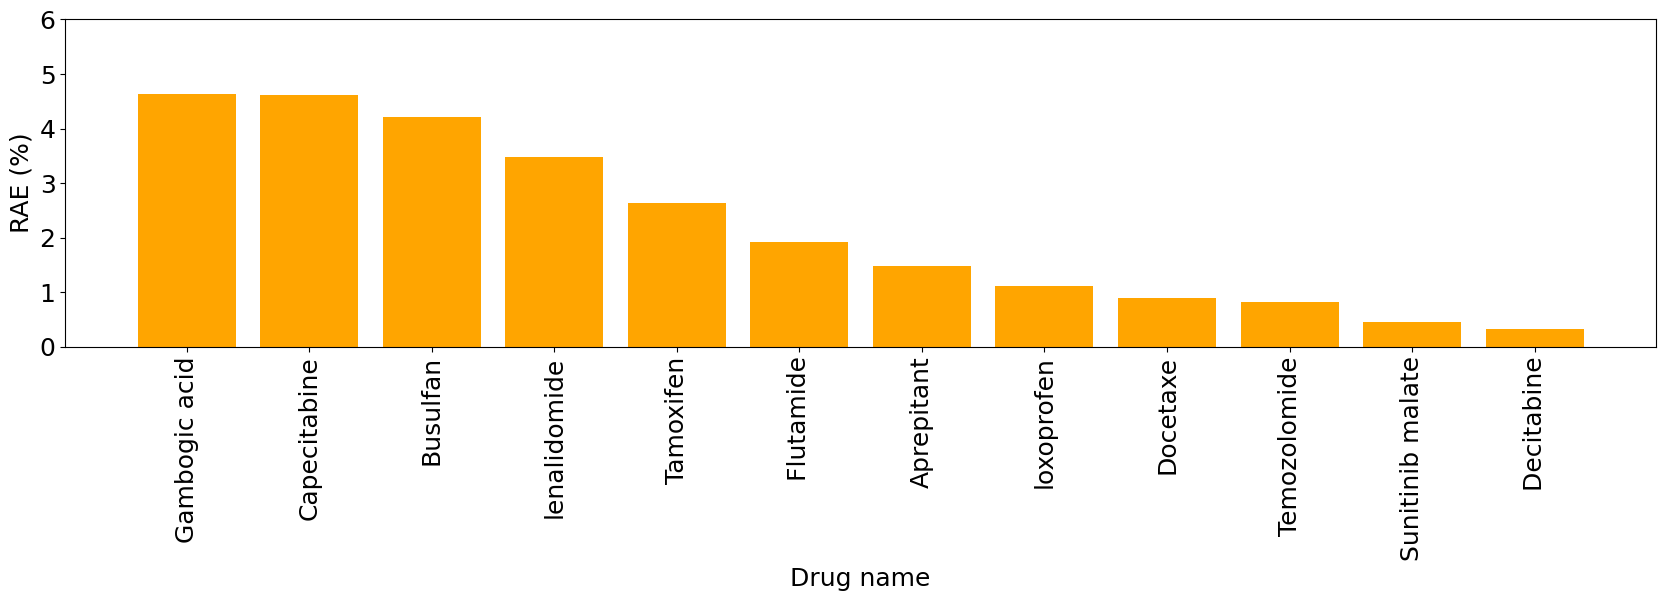

In [13]:
import matplotlib.pyplot as plt

# Plot for RAE% <= 5
plt.figure(figsize=(17, 6.35))
plt.bar(below_5_df['Drug name'], below_5_df['RAE%'], color='orange', align='center')
plt.ylim(0, 6)
plt.ylabel('RAE (%)', fontsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', rotation=90, labelsize=18)
plt.xlabel('Drug name', fontsize=18)


# Adjust layout to fit all labels
plt.tight_layout()
temp_filename = 'raebelow_new.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)


output_filename = 'raebelow_lzw_short.tiff'
img.save(output_filename, compression='tiff_lzw')

# Optional: Remove the temporary file
os.remove(temp_filename)

#files.download(output_filename)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

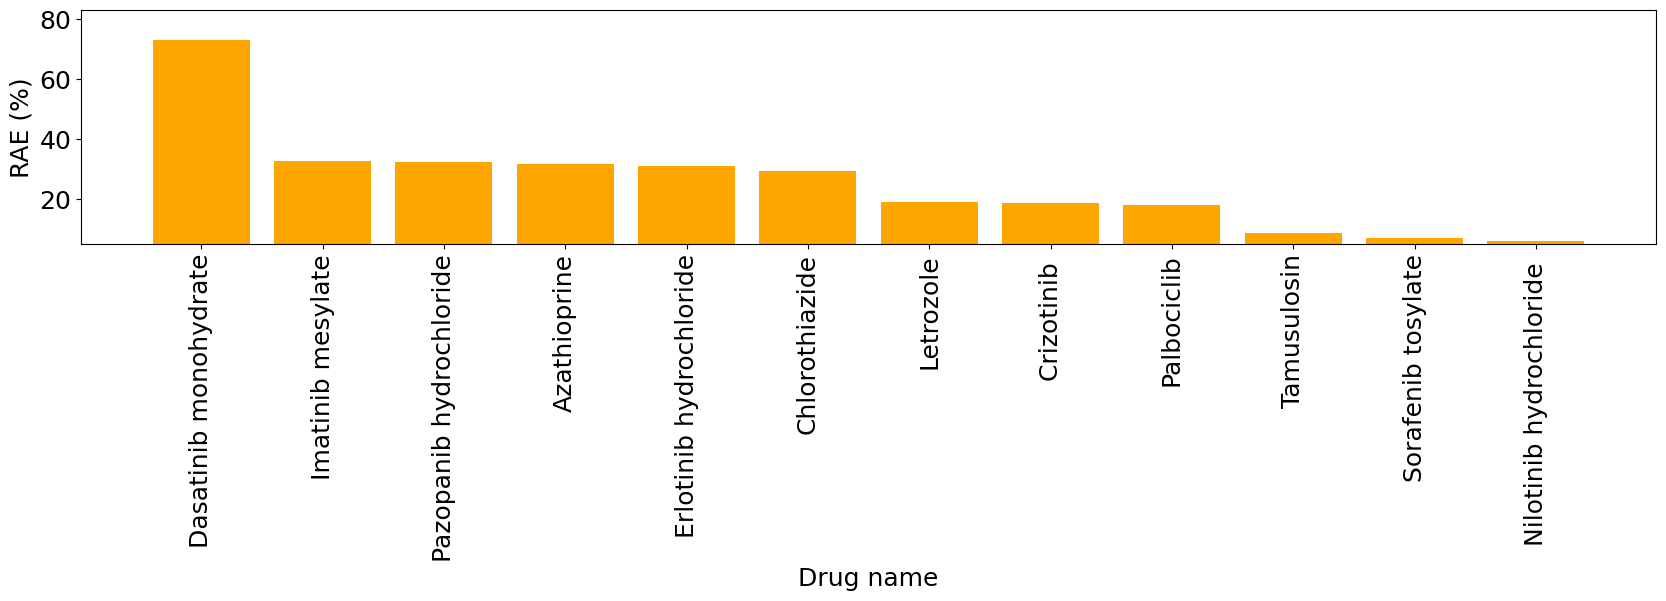

In [14]:
# Plot for RAE% > 5
plt.figure(figsize=(17, 6.35))  # Adjusted for single plot
plt.bar(above_5_df['Drug name'], above_5_df['RAE%'], color='orange', align='center')
plt.ylim(5, above_5_df['RAE%'].max() + 10)
plt.ylabel('RAE (%)', fontsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', rotation=90, labelsize=18)
plt.xlabel('Drug name', fontsize=18)

# Adjust layout to fit all labels
plt.tight_layout()
temp_filename = 'raeabove.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)

output_filename = 'raeabove_lzw_short.tiff'
img.save(output_filename, compression='tiff_lzw')

os.remove(temp_filename)

files.download(output_filename)
plt.show()


In [15]:
df4 = df3

In [16]:
data=df4[df4["Drug name"].str.strip()=="Flutamide"]
data['y6'] = data['y6']/100
data['Predicted'] = data['Predicted']/100

df4['y6'] = df4['y6']/100
df4['Predicted'] = df4['Predicted']/100
data

<ipython-input-16-b842b88aba08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y6'] = data['y6']/100
<ipython-input-16-b842b88aba08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted'] = data['Predicted']/100


,Drug name,mm,mp,t,p,c,y6,Predicted
440,Flutamide,276.2,385.15,308,12.2,771.0,0.648,0.433547
441,Flutamide,276.2,385.15,308,15.2,818.0,0.504,0.484067
442,Flutamide,276.2,385.15,308,18.2,850.0,0.485,0.530229
443,Flutamide,276.2,385.15,308,21.3,876.0,0.559,0.610064
444,Flutamide,276.2,385.15,308,24.3,897.0,0.659,0.703728
445,Flutamide,276.2,385.15,308,27.4,916.0,0.804,0.801326
446,Flutamide,276.2,385.15,308,30.4,931.0,0.906,0.856027
447,Flutamide,276.2,385.15,308,33.4,946.0,0.922,0.943726
448,Flutamide,276.2,385.15,308,35.5,955.0,1.030,0.992751
449,Flutamide,276.2,385.15,318,12.2,661.0,0.396,0.392892


<ipython-input-17-70a980960d4c>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x='p', y='y6', hue='t', data=df4[df4["Drug name"].str.strip()==drug],
<ipython-input-17-70a980960d4c>:6: UserWarning: The markers list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x='p', y='y6', hue='t', data=df4[df4["Drug name"].str.strip()==drug],


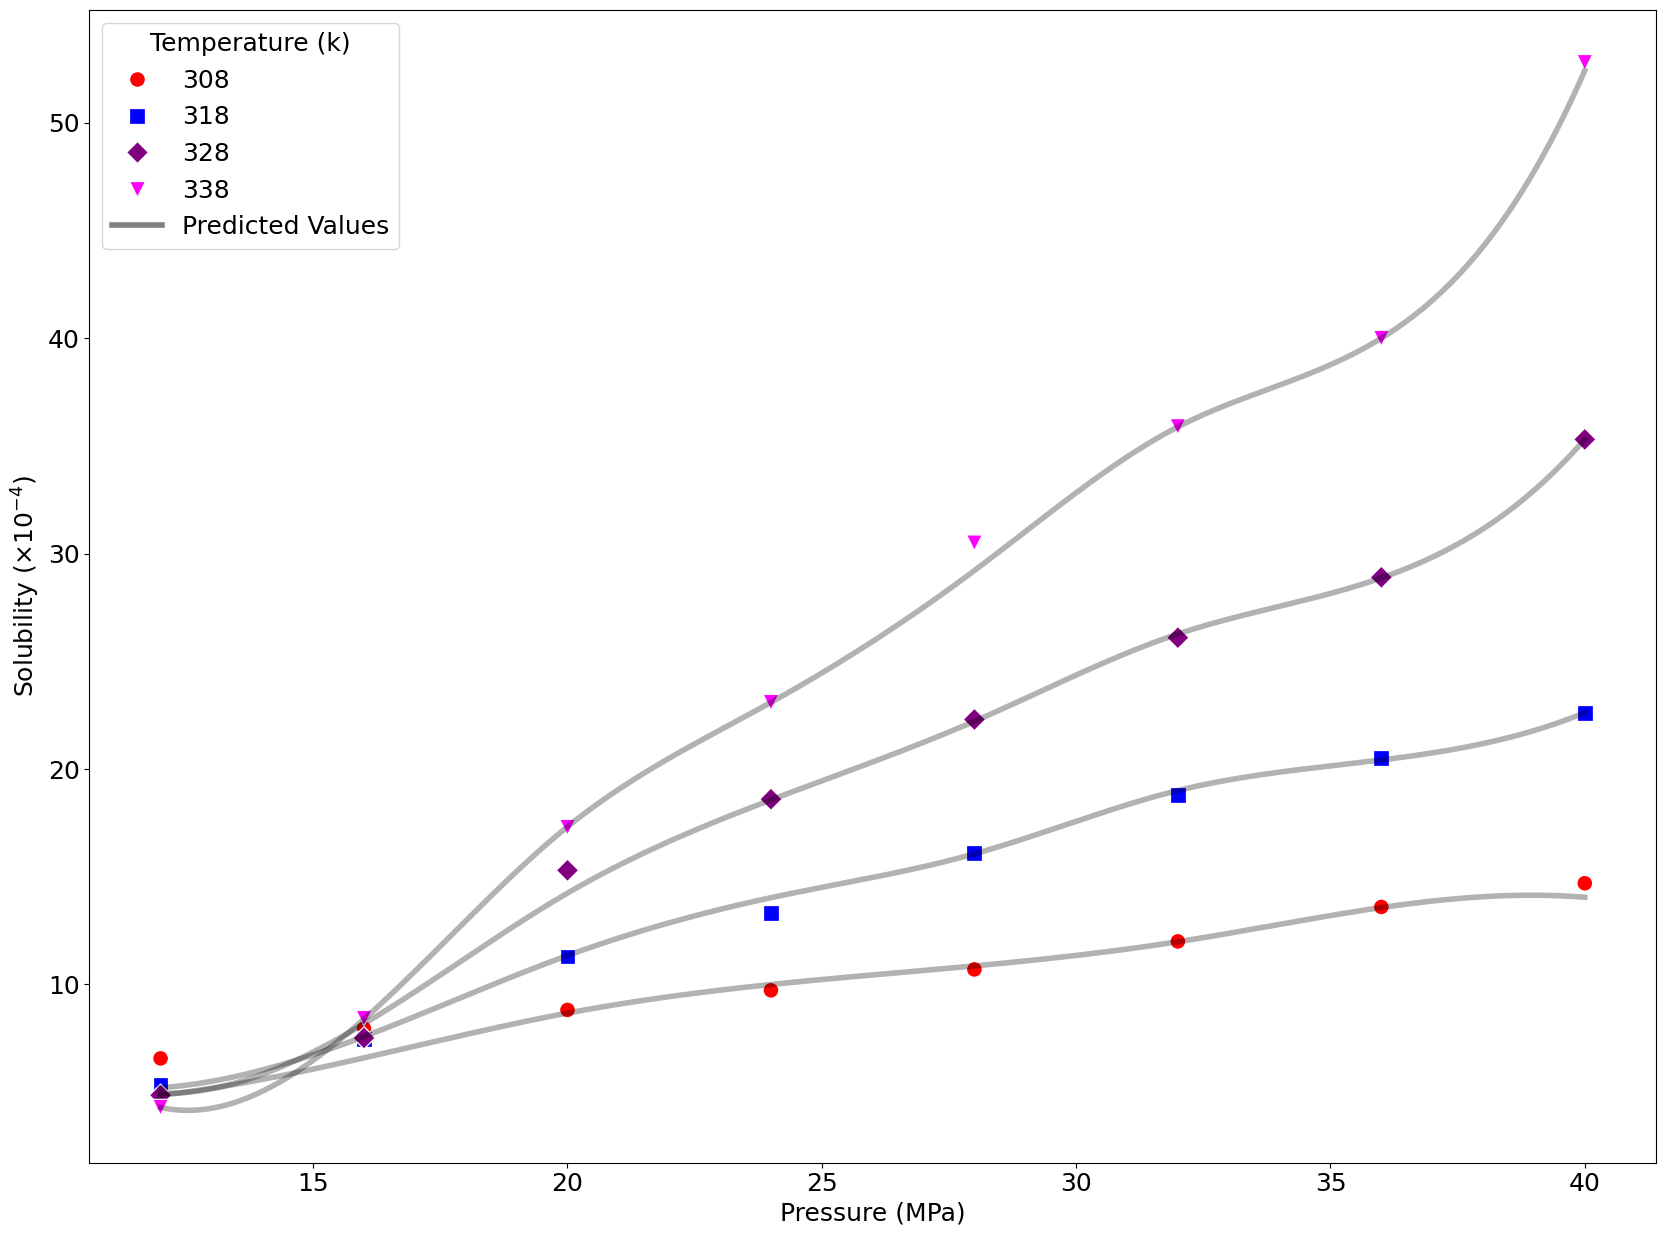

In [17]:
from matplotlib.lines import Line2D
# Create scatter plot with lines
plt.figure(figsize=(17, 12.7))
drug = "Temozolomide"
# Scatter plot with dots
sns.scatterplot(x='p', y='y6', hue='t', data=df4[df4["Drug name"].str.strip()==drug],
                palette=['red', 'blue', 'purple', 'magenta', 'green'],
                style='t', markers=['o', 's', 'D', 'v', '^'], s=130)

unique_temps = df4[df4["Drug name"].str.strip() == drug]['t'].unique()
for temp in unique_temps:
    temp_data = df4[(df4["Drug name"].str.strip() == drug) & (df4['t'] == temp)]
    x = temp_data['p']
    y = temp_data['Predicted']

    # Interpolation
    x_smooth = np.linspace(x.min(), x.max(), 300)  # 300 points for smooth curve
    spline = make_interp_spline(x, y, k=3)  # Cubic spline
    y_smooth = spline(x_smooth)

    plt.plot(x_smooth, y_smooth, alpha=0.3, color='black', linewidth=4)



plt.xlabel(r'Pressure (MPa)')
plt.ylabel(r'Solubility ($\times 10^{-4}$)')
plt.legend(title='Temperature (k)')
# Legend
custom_lines = [Line2D([0], [0], color='gray', lw=4)]
legend_labels = ['Predicted Values']

# Get existing legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Combine existing legend with custom legend
combined_handles = handles + custom_lines
combined_labels = labels + legend_labels

plt.legend(combined_handles, combined_labels, title='Temperature (k)')

# Adjust layout to fit all labels
plt.tight_layout()
temp_filename = 'Temozolomide.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)

output_filename = 'Temozolomide_lzw.tiff'
img.save(output_filename, compression='tiff_lzw')

os.remove(temp_filename)

#files.download(output_filename)

plt.show()

<ipython-input-18-fa051eae08e6>:10: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='t', y='y6', hue='p', data=df2[df2["Drug name"].str.strip() == drug],
<ipython-input-18-fa051eae08e6>:10: UserWarning: 
The markers list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='t', y='y6', hue='p', data=df2[df2["Drug name"].str.strip() == drug],


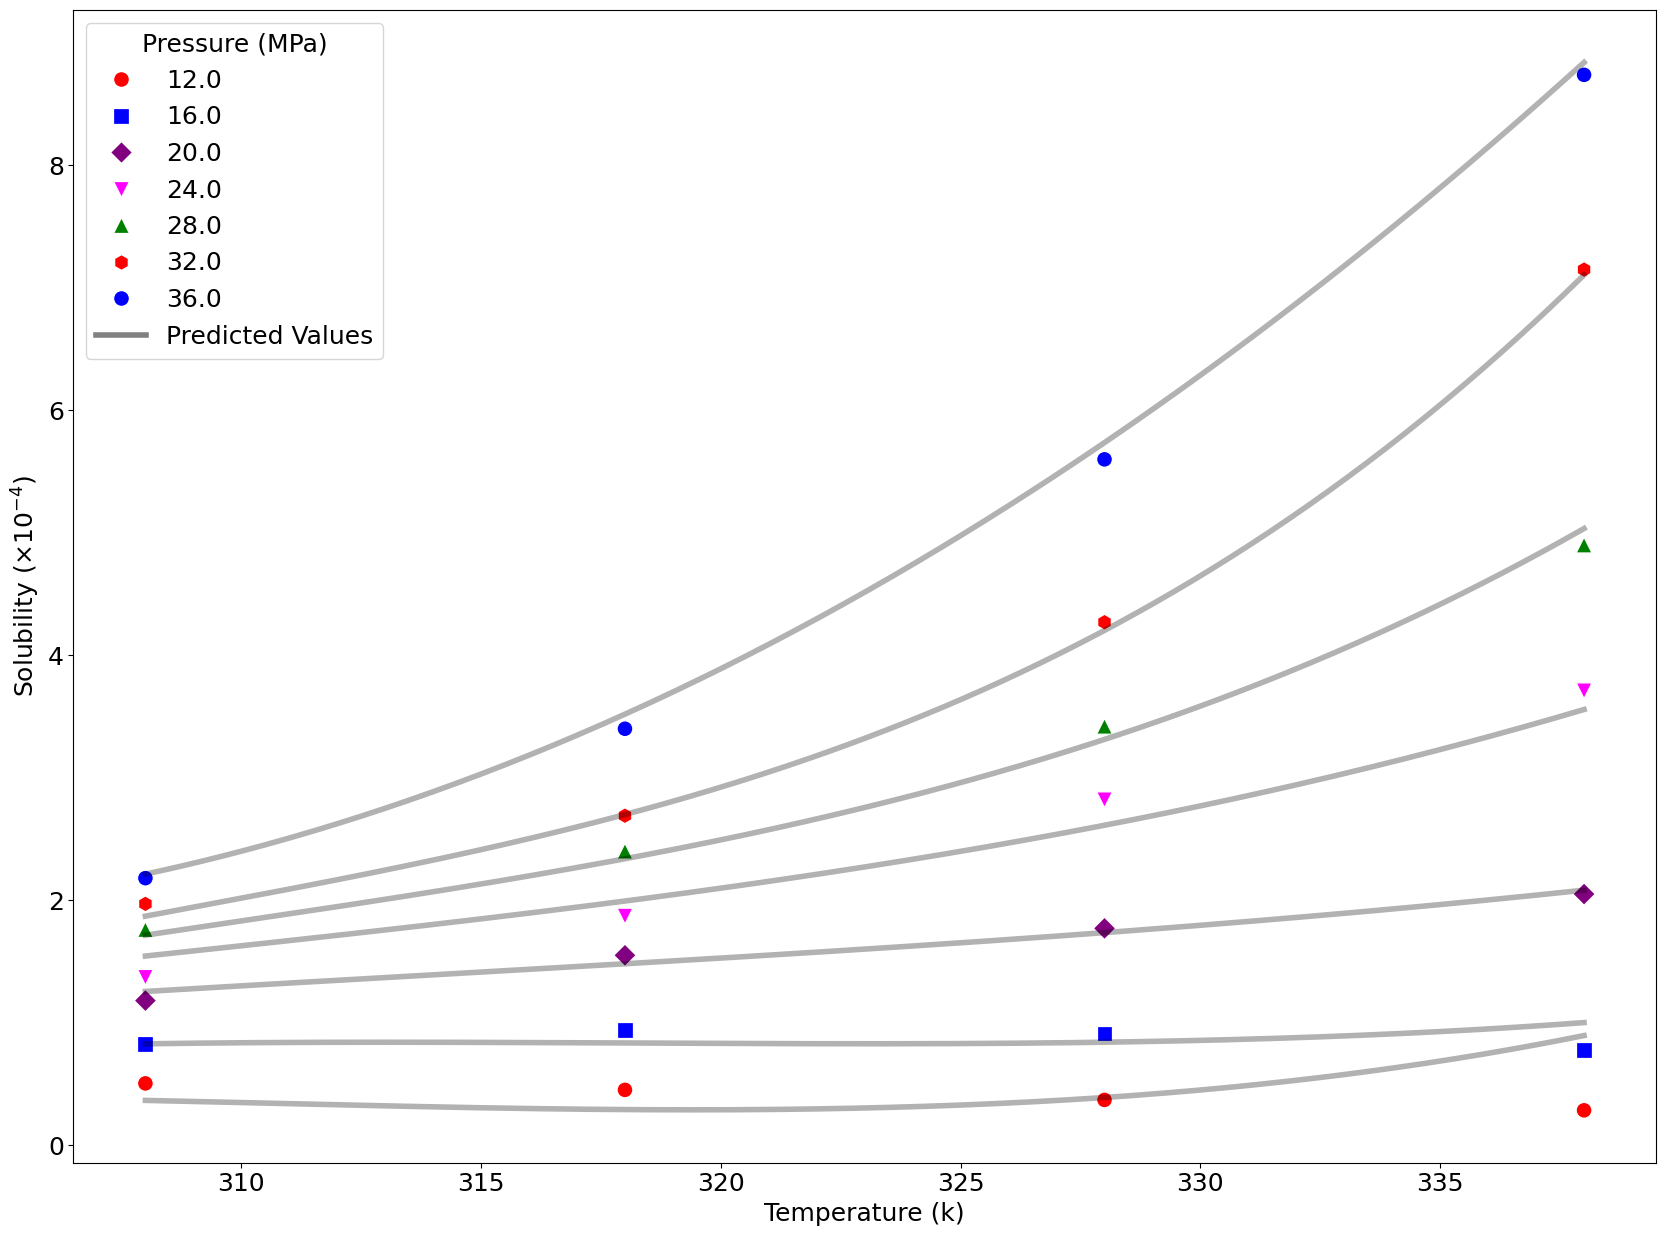

In [18]:
df2 = df4[df4['p']<39]
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.lines import Line2D
plt.figure(figsize=(17, 12.7))

# Scatter plot with dots
drug = "Decitabine"
sns.scatterplot(x='t', y='y6', hue='p', data=df2[df2["Drug name"].str.strip() == drug],
                palette=['red', 'blue', 'purple', 'magenta', 'green'],
                style='p', markers=['o', 's', 'D', 'v', '^', 'h'], s=130)

# Plot lines with interpolation
unique_pressures = df2[df2["Drug name"].str.strip() == drug]['p'].unique()
for pressure in unique_pressures:
    pressure_data = df2[(df2["Drug name"].str.strip() == drug) & (df2['p'] == pressure)]
    x = pressure_data['t']
    y = pressure_data['Predicted']

    # Interpolation
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    plt.plot(x_smooth, y_smooth, alpha=0.3, color='black', lw=4)

# Customize the plot
plt.xlabel(r'Temperature (k)')
plt.ylabel(r'Solubility ($\times 10^{-4}$)')

# Legend
custom_lines = [Line2D([0], [0], color='gray', lw=4)]
legend_labels = ['Predicted Values']

handles, labels = plt.gca().get_legend_handles_labels()

combined_handles = handles + custom_lines
combined_labels = labels + legend_labels

plt.legend(combined_handles, combined_labels, title='Pressure (MPa)')
plt.tight_layout()
temp_filename = 'Decitabine.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)

output_filename = 'Decitabine_lzw_18.tiff'
img.save(output_filename, compression='tiff_lzw')

os.remove(temp_filename)

#files.download(output_filename)
# Display the plot
plt.show()

In [19]:
selected_drug_names = ['capecitabine', 'docetaxe', 'flutamide', 'letrozole', 'tamoxifen']  # Replace with your actual drug names

# Filter the DataFrame to include only rows where 'Drug name' is in the selected list
filtered_df = df4[df4['Drug name'].str.lower().str.strip().isin(selected_drug_names)]

In [20]:
average_y6 = filtered_df.groupby(['Drug name', 'p'])['y6'].mean().reset_index()
filtered_df["av"] = average_y6["y6"]
average_y6

<ipython-input-20-0864e9e1e879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["av"] = average_y6["y6"]


,Drug name,p,y6
0,Flutamide,12.2,0.29740
1,Flutamide,15.2,0.31280
2,Flutamide,18.2,0.78660
3,Flutamide,21.3,0.84980
4,Flutamide,24.3,1.08860
5,Flutamide,27.4,1.49640
6,Flutamide,30.4,1.93540
7,Flutamide,33.4,2.30220
8,Flutamide,35.5,2.73540
9,Capecitabine,15.2,0.05120


In [21]:
predicted_avg = filtered_df.groupby(['Drug name', 'p'])['Predicted'].mean().reset_index()
filtered_df["av"] = predicted_avg["Predicted"]
predicted_avg

<ipython-input-21-635810e81a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["av"] = predicted_avg["Predicted"]


,Drug name,p,Predicted
0,Flutamide,12.2,0.226218
1,Flutamide,15.2,0.454176
2,Flutamide,18.2,0.698881
3,Flutamide,21.3,0.914207
4,Flutamide,24.3,1.112015
5,Flutamide,27.4,1.374686
6,Flutamide,30.4,1.770541
7,Flutamide,33.4,2.298966
8,Flutamide,35.5,2.727992
9,Capecitabine,15.2,0.058830


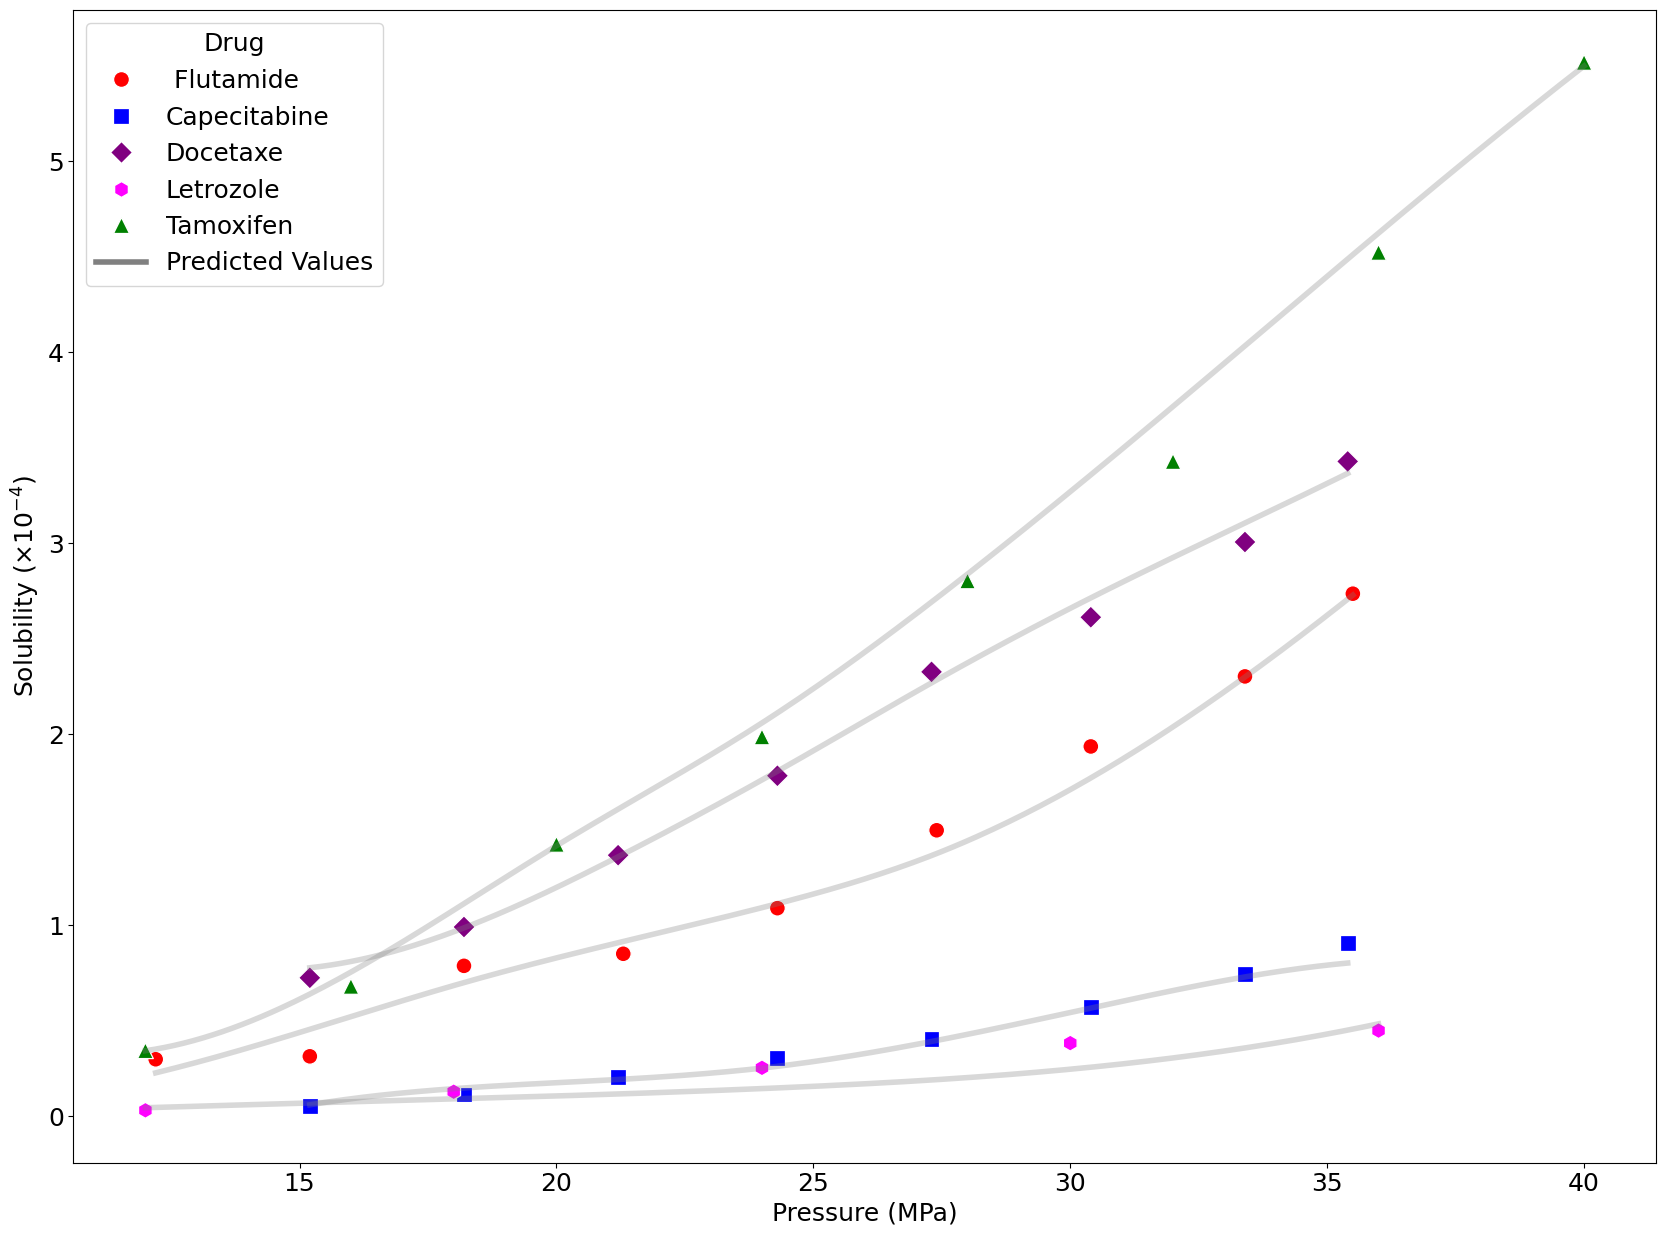

In [22]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(17, 12.7))

sns.scatterplot(x='p', y='y6', hue='Drug name', data=average_y6,
                palette=['red', 'blue', 'purple', 'magenta', 'green'],
                style='Drug name', markers=['o', 's', 'D', 'h', '^'], s=130)

for drug in predicted_avg['Drug name'].unique():
    drug_data = predicted_avg[predicted_avg['Drug name'] == drug]

    drug_data = drug_data.sort_values(by='p')

    x = drug_data['p'].values
    y = drug_data['Predicted'].values

    # Interpolation
    if len(x) > 2 and np.all(np.diff(x) > 0):
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spline = make_interp_spline(x, y, k=3)
        y_smooth = spline(x_smooth)

        plt.plot(x_smooth, y_smooth, color='grey', alpha=0.3, lw=4)


# Customize the plot
plt.xlabel(r'Pressure (MPa)')
plt.ylabel(r'Solubility ($\times 10^{-4}$)')
plt.legend(title='Drug')

# Custom grey line for legend
custom_lines = [Line2D([0], [0], color='gray', lw=4)]
legend_labels = ['Predicted Values']

handles, labels = plt.gca().get_legend_handles_labels()

combined_handles = handles + custom_lines
combined_labels = labels + legend_labels


plt.legend(combined_handles, combined_labels, title='Drug')

# Save the plot
plt.tight_layout()
temp_filename = 'drugs.tiff'
plt.savefig(temp_filename, dpi=600)

img = Image.open(temp_filename)

output_filename = 'drugs_lzw.tiff'
img.save(output_filename, compression='tiff_lzw')

os.remove(temp_filename)

#files.download(output_filename)

# Display the plot
plt.show()
